# This notebook will contain feature engineering steps:

- Encoding categorical variables

- Feature scaling (e.g., standardization, normalization)

- Feature selection (optional)

- Creating new features (if applicable)

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Input 01-notebook file

In [54]:
path = '../data/cleaned/heart_2022_cleaned_01.csv'

In [55]:
# read data
df = pd.read_csv(path ,sep=',',encoding='utf-8')
df.sample(5)

State     Sex GeneralHealth  PhysicalHealthDays  \
13210      Arizona    Male     Very good                 3.0   
28446   California    Male          Good                 2.0   
50006  Connecticut  Female     Very good                 0.0   
21929     Arkansas  Female     Very good                 0.0   
15402      Arizona  Female          Fair                15.0   

       MentalHealthDays                                    LastCheckupTime  \
13210               1.0  Within past year (anytime less than 12 months ...   
28446               0.0  Within past year (anytime less than 12 months ...   
50006               0.0  Within past year (anytime less than 12 months ...   
21929               0.0  Within past year (anytime less than 12 months ...   
15402              30.0  Within past year (anytime less than 12 months ...   

      PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
13210                Yes         7.0                  1 to 5            Yes   
28446                Yes         8.0            None of them            Yes   
50006                Yes         7.0            None of them             No   
21929                Yes         8.0            None of them             No   
15402                 No         3.0  6 or more, but not all             No   

       ...    BMI AlcoholDrinkers HIVTesting FluVaxLast12 PneumoVaxEver  \
13210  ...  29.53             Yes         No          Yes            No   
28446  ...  20.36              No        Yes          Yes           Yes   
50006  ...  25.79             Yes        Yes           No            No   
21929  ...  27.44             Yes         No           No            No   
15402  ...  58.95              No        Yes           No            No   

                                       TetanusLast10Tdap HighRiskLastYear  \
13210  No, did not receive any tetanus shot in the pa...               No   
28446                                 Yes, received Tdap               No   
50006  Yes, received tetanus shot but not sure what type               No   
21929                                 Yes, received Tdap               No   
15402  No, did not receive any tetanus shot in the pa...              Yes   

                                                CovidPos HadHeartAttack_bin  \
13210                                                 No                  1   
28446                                                 No                  1   
50006                                                Yes                  0   
21929  Tested positive using home test without a heal...                  0   
15402                                                 No                  0   

      HeartAttackBinary  
13210                 1  
28446                 1  
50006                 0  
21929                 0  
15402                 0  

[5 rows x 42 columns]

In [56]:
df.info()
df = df.drop(columns = ["HadHeartAttack_bin", "HeartAttackBinary"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59903 entries, 0 to 59902
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      59903 non-null  object 
 1   Sex                        59903 non-null  object 
 2   GeneralHealth              59903 non-null  object 
 3   PhysicalHealthDays         59903 non-null  float64
 4   MentalHealthDays           59903 non-null  float64
 5   LastCheckupTime            59903 non-null  object 
 6   PhysicalActivities         59903 non-null  object 
 7   SleepHours                 59903 non-null  float64
 8   RemovedTeeth               59903 non-null  object 
 9   HadHeartAttack             59903 non-null  object 
 10  HadAngina                  59903 non-null  object 
 11  HadStroke                  59903 non-null  object 
 12  HadAsthma                  59903 non-null  object 
 13  HadSkinCancer              59903 non-null  obj

> Calculate correlation between each feature


üìä Êï∏ÂÄºËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñÔºàPearsonÔºâ:


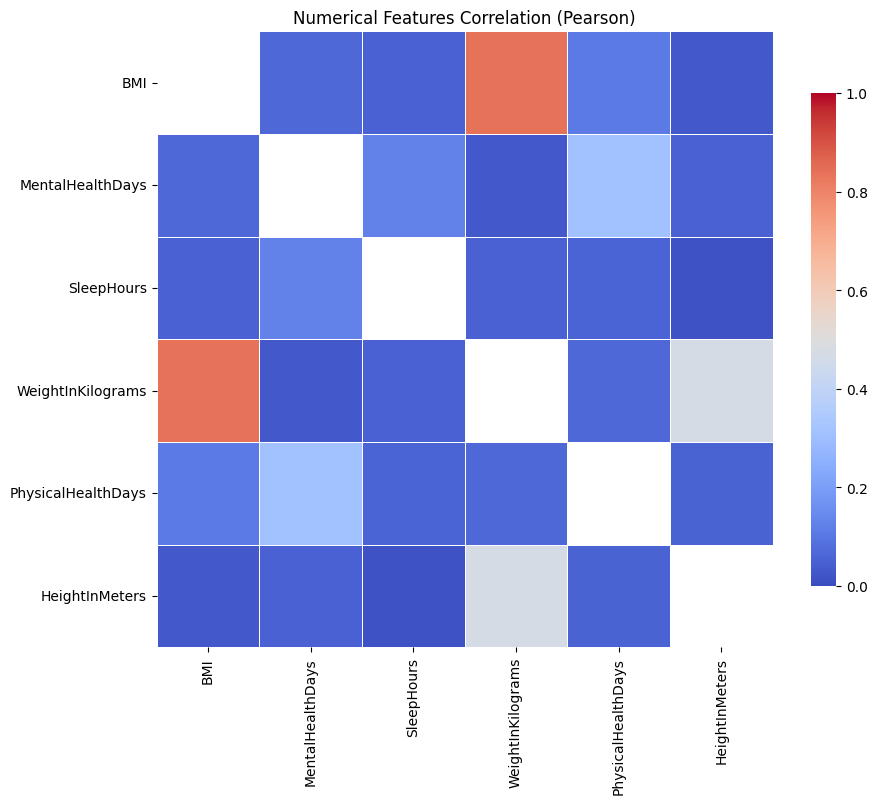


üìä È°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñÔºàCram√©r's VÔºâ:


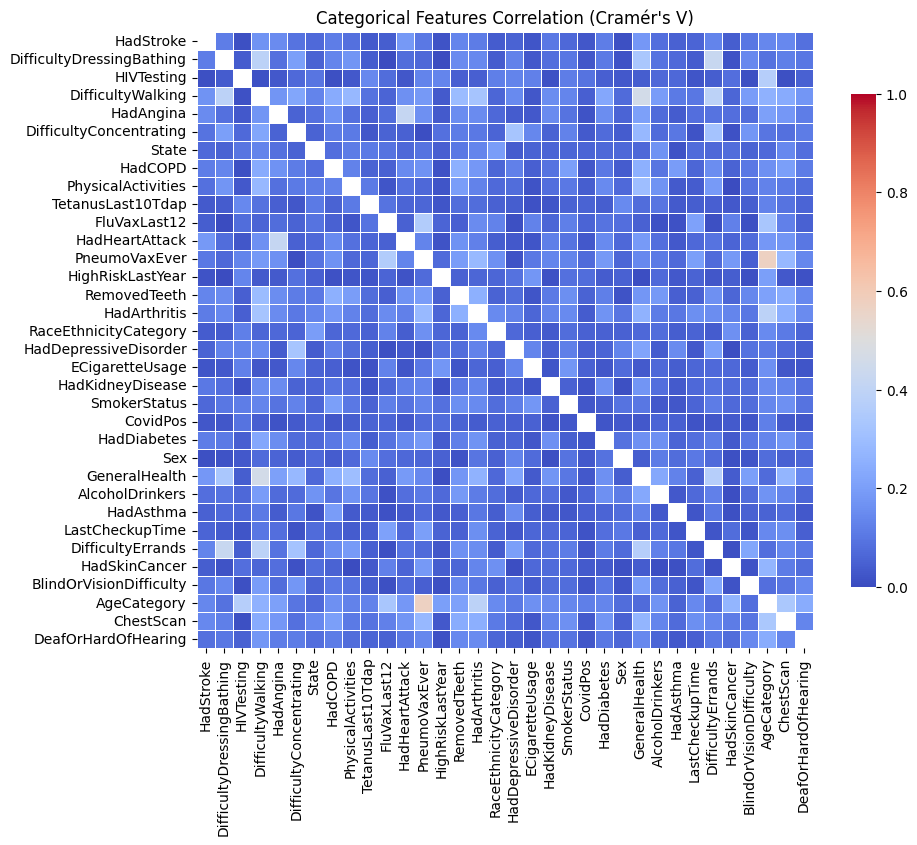


üìä Êï∏ÂÄºËàáÈ°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñÔºàPoint BiserialÔºâ:


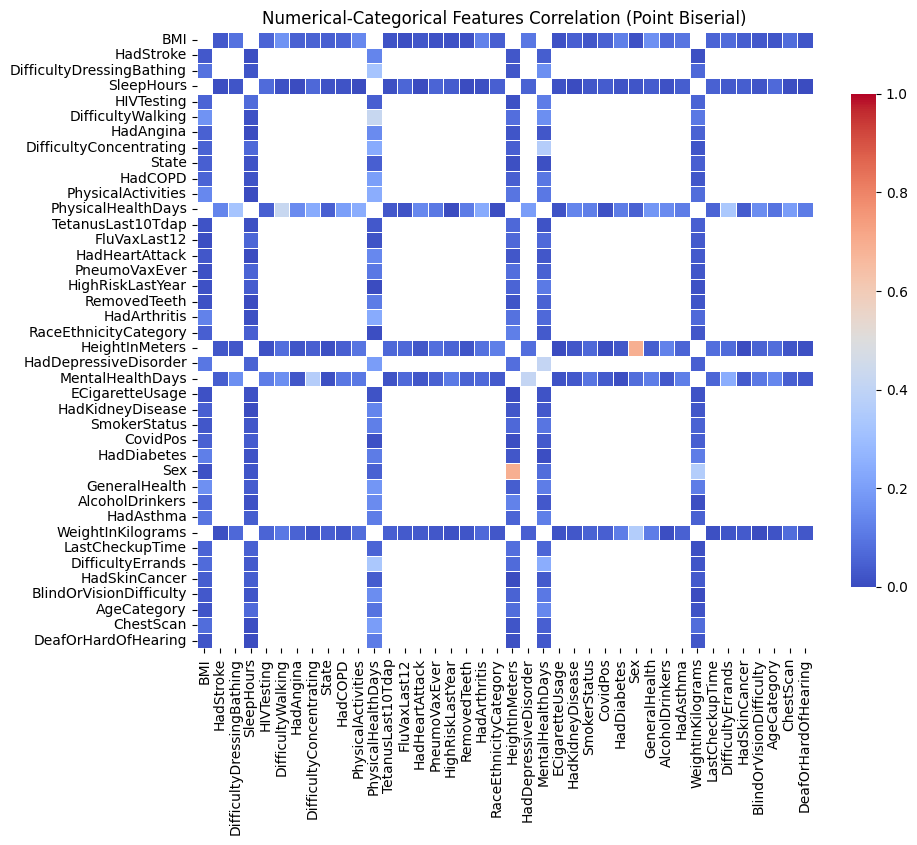

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency

# === Ë®àÁÆó Cram√©r's V (È°ûÂà•ËÆäÊï∏‰πãÈñì) ===
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return 0.0
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    return np.sqrt(phi2 / min(k - 1, r - 1)) if min(k - 1, r - 1) > 0 else 0.0

# === Ë®àÁÆó Point Biserial Correlation (Êï∏ÂÄºËàáÈ°ûÂà•) ===
def point_biserial(x, y):
    try:
        corr, _ = pointbiserialr(x, y)
        return abs(corr)
    except Exception:
        return np.nan

# === ÁâπÂæµÂàÜÈ°û ===
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# === Ë®àÁÆóÁâπÂæµ‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ ===
cat_corr = {}  # È°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑ Cram√©r's V
num_corr = {}  # Êï∏ÂÄºËÆäÊï∏‰πãÈñìÁöÑ Pearson Áõ∏Èóú‰øÇÊï∏
mix_corr = {}  # Êï∏ÂÄºËàáÈ°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑ Point Biserial Áõ∏Èóú‰øÇÊï∏

# === Ë®àÁÆóÈ°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ (Cram√©r's V) ===
for i, col1 in enumerate(cat_cols):
    for col2 in cat_cols[i+1:]:
        v = cramers_v(df[col1], df[col2])
        cat_corr[(col1, col2)] = v

# === Ë®àÁÆóÊï∏ÂÄºËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ (Pearson) ===
for i, col1 in enumerate(num_cols):
    for col2 in num_cols[i+1:]:
        try:
            corr = df[col1].corr(df[col2], method='pearson')
            num_corr[(col1, col2)] = abs(corr)
        except Exception:
            num_corr[(col1, col2)] = np.nan

# === Ë®àÁÆóÊï∏ÂÄºËÆäÊï∏ËàáÈ°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ (Point Biserial) ===
for col1 in cat_cols:
    for col2 in num_cols:
        try:
            x = df[col2].astype(float)
            y = pd.factorize(df[col1])[0]
            corr = point_biserial(x, y)
            if not np.isnan(corr):
                mix_corr[(col1, col2)] = corr
        except Exception:
            mix_corr[(col1, col2)] = np.nan

# === Â∞áÁõ∏Èóú‰øÇÊï∏ËΩâÁÇ∫ DataFrame Ê†ºÂºè ===
def dict_to_matrix(corr_dict):
    cols = list(set([key[0] for key in corr_dict.keys()] + [key[1] for key in corr_dict.keys()]))
    matrix = pd.DataFrame(np.nan, index=cols, columns=cols)
    for (col1, col2), value in corr_dict.items():
        matrix.loc[col1, col2] = value
        matrix.loc[col2, col1] = value  # Â∞çÁ®±Áü©Èô£
    return matrix

# ËΩâÊèõÁõ∏Èóú‰øÇÊï∏Â≠óÂÖ∏ÁÇ∫ DataFrame
num_corr_df = dict_to_matrix(num_corr)
cat_corr_df = dict_to_matrix(cat_corr)
mix_corr_df = dict_to_matrix(mix_corr)

# === Áπ™Ë£ΩÁõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñ (ÁÑ°Êï∏Â≠óÊ®ôË®ª) ===
def plot_heatmap(corr_df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
    plt.title(title)
    plt.show()

# Êï∏ÂÄºËÆäÊï∏Áõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñ
print("\nüìä Êï∏ÂÄºËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñÔºàPearsonÔºâ:")
plot_heatmap(num_corr_df, "Numerical Features Correlation (Pearson)")

# È°ûÂà•ËÆäÊï∏Áõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñ
print("\nüìä È°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñÔºàCram√©r's VÔºâ:")
plot_heatmap(cat_corr_df, "Categorical Features Correlation (Cram√©r's V)")

# Êï∏ÂÄºËàáÈ°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñ
print("\nüìä Êï∏ÂÄºËàáÈ°ûÂà•ËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÁÜ±ÂäõÂúñÔºàPoint BiserialÔºâ:")
plot_heatmap(mix_corr_df, "Numerical-Categorical Features Correlation (Point Biserial)")


In [58]:
# import pandas as pd
# import numpy as np
# from scipy.stats import pointbiserialr, chi2_contingency

# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
#         return 0.0
#     chi2, _, _, _ = chi2_contingency(confusion_matrix)
#     n = confusion_matrix.sum().sum()
#     r, k = confusion_matrix.shape
#     phi2 = chi2 / n
#     return np.sqrt(phi2 / min(k - 1, r - 1)) if min(k - 1, r - 1) > 0 else 0.0

# # È†êË®≠ target Â∑≤Á∂ì LabelEncoded Êàê 0/1
# target = "HadHeartAttack"

# cat_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target, errors="ignore").tolist()
# num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# df["HadHeartAttack_bin"] = df["HadHeartAttack"].map({"Yes": 1, "No": 0})
# # === È°ûÂà•ÂûãÊ¨Ñ‰ΩçÔºöCram√©r's V ===
# cat_corr = {}
# for col in cat_cols:
#     valid = df[[col, target]]
#     if not valid.empty:
#         cat_corr[col] = cramers_v(valid[col], valid[target])

# # === Êï∏ÂÄºÂûãÊ¨Ñ‰ΩçÔºöPoint Biserial Correlation ===
# num_corr = {}
# for col in num_cols:
#     valid = df[[col, "HadHeartAttack_bin"]]
#     try:
#         x = valid[col].astype(float)
#         y = valid["HadHeartAttack_bin"].astype(int)
#         corr, _ = pointbiserialr(x, y)
#         if np.isscalar(corr) and not np.isnan(corr):  # Á¢∫‰øùÊòØÊï∏ÂÄº‰∏î‰∏çÊòØ NaN
#             num_corr[col] = abs(corr)
#     except Exception as e:
#         print(f"{col} Ë®àÁÆóÈåØË™§Ôºö{e}")

# # === ÊéíÂ∫èËàáËº∏Âá∫ ===
# sorted_cat = sorted(cat_corr.items(), key=lambda x: float(x[1]), reverse=True)
# sorted_num = sorted(num_corr.items(), key=lambda x: float(x[1]), reverse=True)

# print("\nüìä Êï∏ÂÄºÂûãÁâπÂæµËàáÁõÆÊ®ôËÆäÊï∏ÁöÑÁõ∏Èóú‰øÇÊï∏ÔºàPoint BiserialÔºâ:")
# for col, score in sorted_num:
#     print(f"{col}: {score:.4f}")
# print("üìä È°ûÂà•ÂûãÁâπÂæµËàáÁõÆÊ®ôËÆäÊï∏ÁöÑÁõ∏Èóú‰øÇÊï∏ÔºàCram√©r‚Äôs VÔºâ:")
# for col, score in sorted_cat:
#     print(f"{col}: {score:.4f}")


### Encoding

In [59]:
col_obj = df.select_dtypes('object').columns

le = LabelEncoder()

for col in col_obj:
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59903 entries, 0 to 59902
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      59903 non-null  int64  
 1   Sex                        59903 non-null  int64  
 2   GeneralHealth              59903 non-null  int64  
 3   PhysicalHealthDays         59903 non-null  float64
 4   MentalHealthDays           59903 non-null  float64
 5   LastCheckupTime            59903 non-null  int64  
 6   PhysicalActivities         59903 non-null  int64  
 7   SleepHours                 59903 non-null  float64
 8   RemovedTeeth               59903 non-null  int64  
 9   HadHeartAttack             59903 non-null  int64  
 10  HadAngina                  59903 non-null  int64  
 11  HadStroke                  59903 non-null  int64  
 12  HadAsthma                  59903 non-null  int64  
 13  HadSkinCancer              59903 non-null  int

In [60]:
df.sample(5)

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
23756      3    0              2                 0.0               0.0   
33325      4    0              4                 0.0               0.0   
55962      6    0              2                 6.0               0.0   
15235      2    0              4                 1.0               0.0   
46138      5    1              2                15.0               7.0   

       LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
23756                3                   1         8.0             3   
33325                3                   1         7.0             3   
55962                3                   1        10.0             0   
15235                3                   1         4.0             3   
46138                1                   0         6.0             3   

       HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
23756               0  ...            1.60             98.430  38.44   
33325               0  ...            1.65             67.130  25.04   
55962               0  ...            1.57             79.605  29.76   
15235               0  ...            1.52             65.770  28.32   
46138               1  ...            1.75             95.250  31.01   

       AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
23756                0           0             0              0   
33325                1           0             1              1   
55962                0           1             1              0   
15235                0           0             0              1   
46138                0           1             0              0   

       TetanusLast10Tdap  HighRiskLastYear  CovidPos  
23756                  1                 0         2  
33325                  1                 0         0  
55962                  1                 0         0  
15235                  2                 0         0  
46138                  2                 0         2  

[5 rows x 40 columns]

> Âà©Áî® GAM Ê®°ÂûãÂéªÊ™¢Êü•‰∫§‰∫í‰ΩúÁî®È†ÖÁöÑÂêàÁêÜÊÄß

### Features Selection (ToDo)

### Creating new features (ToDo)

> Visualizing relationship of each feature

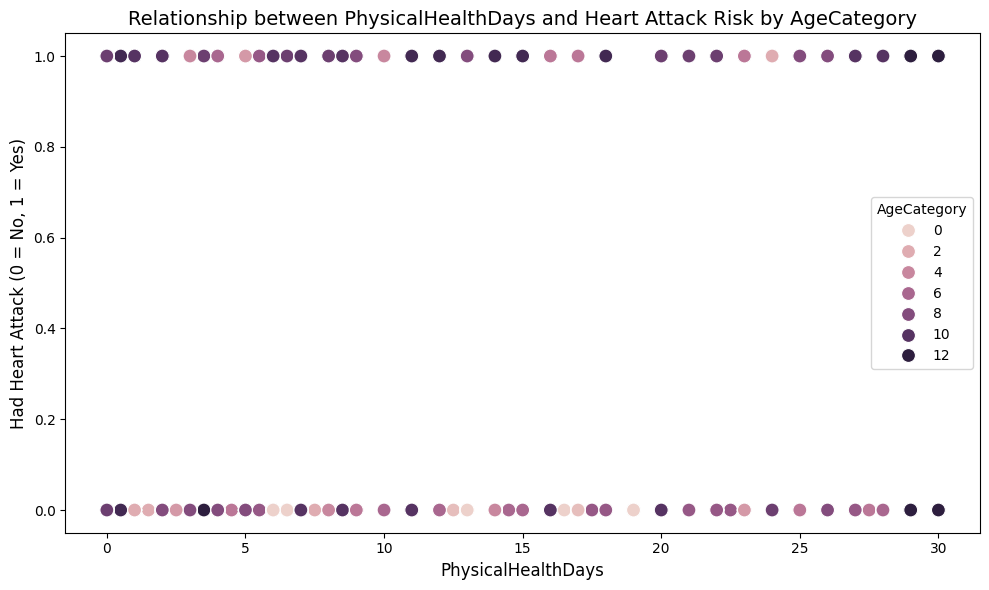

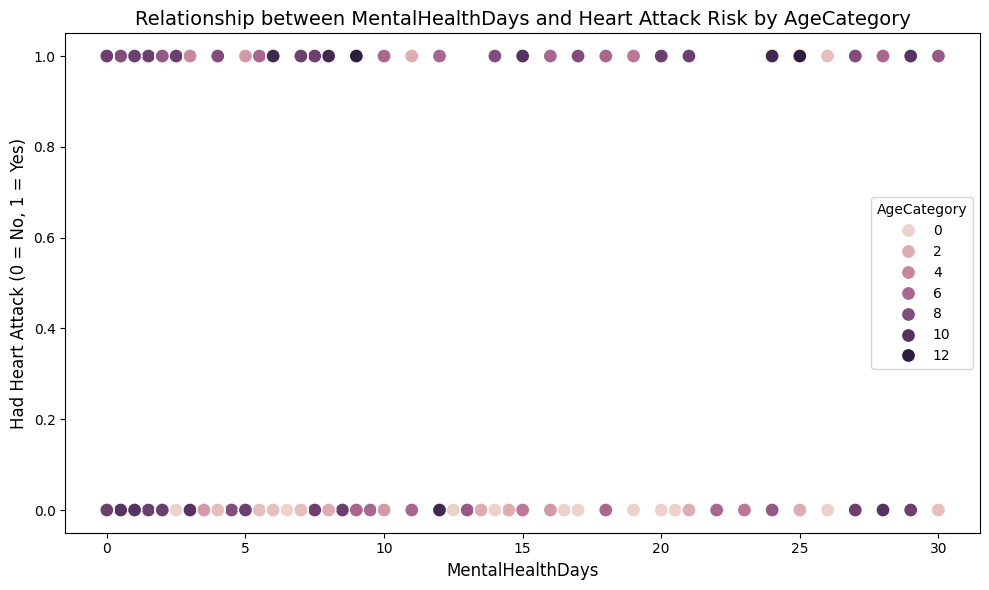

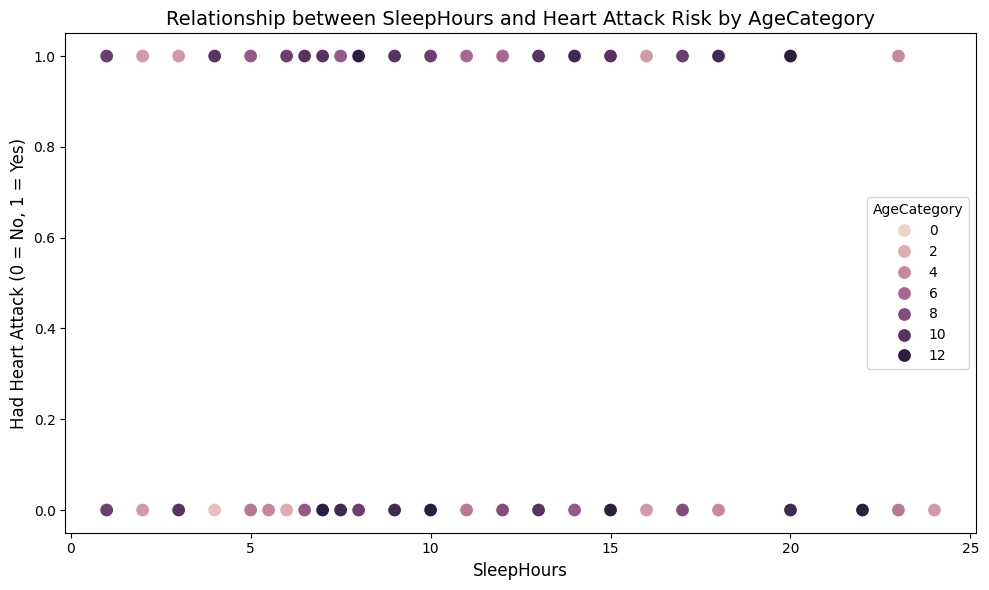

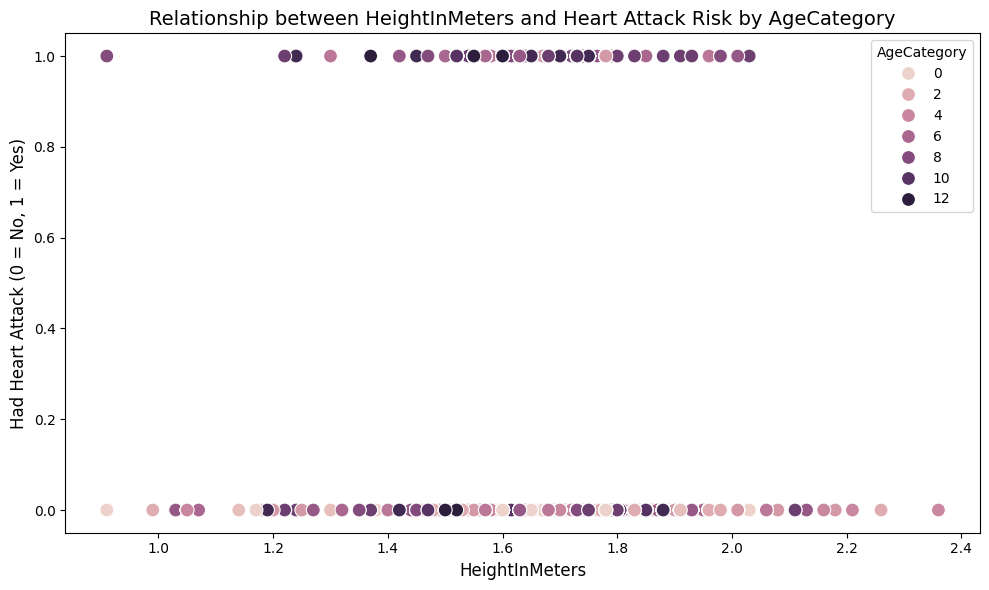

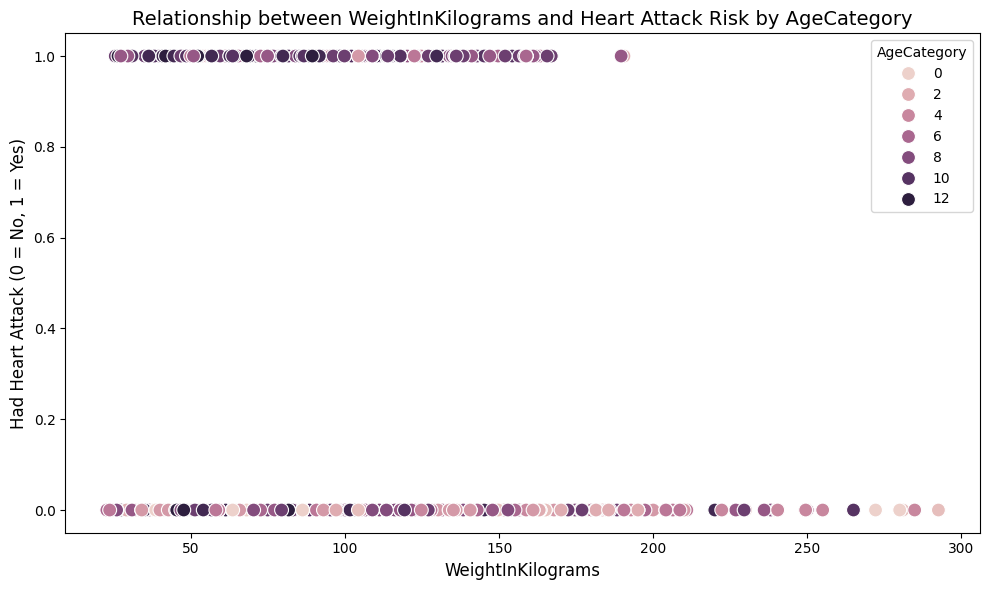

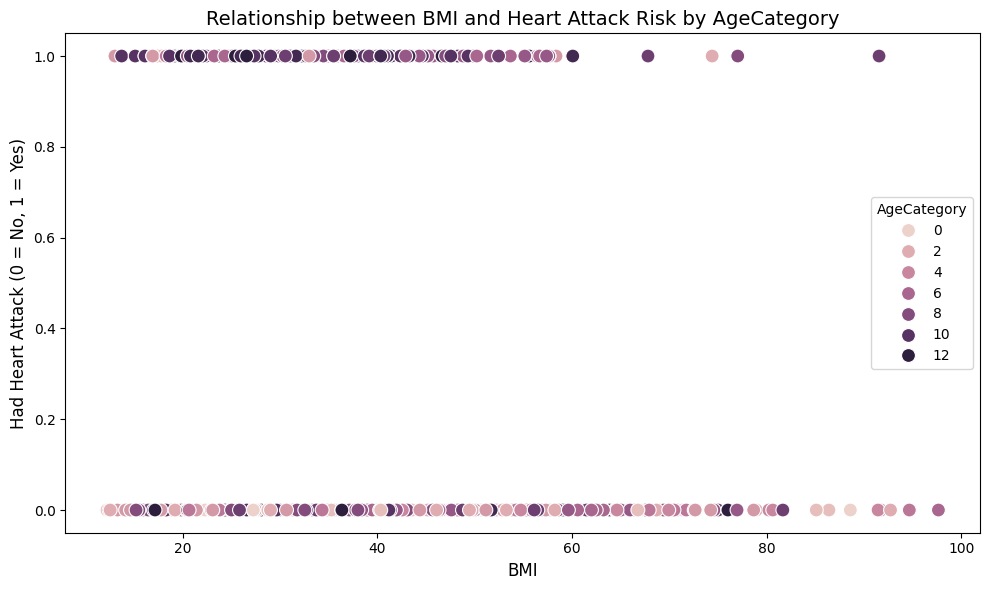

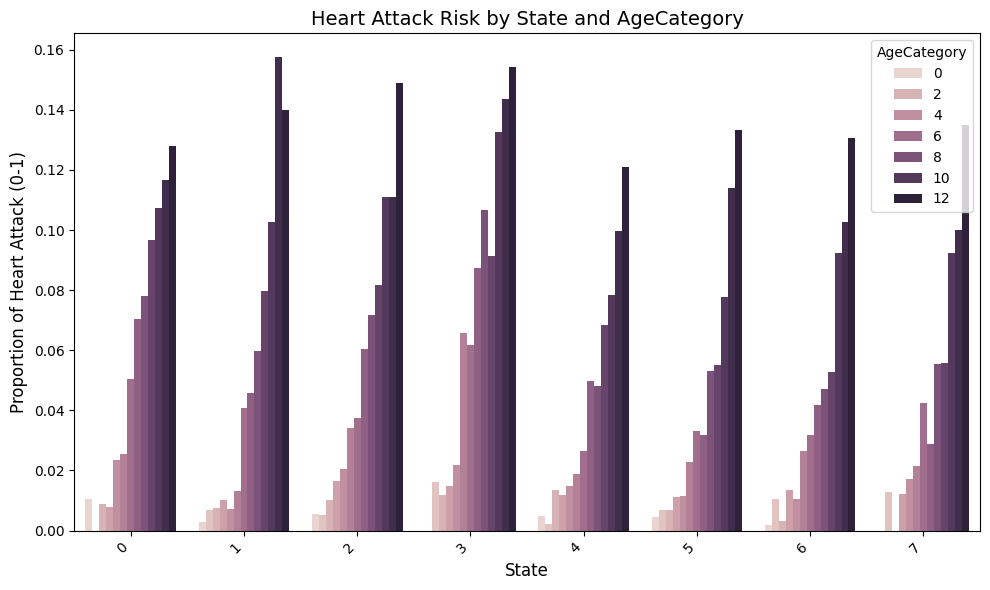

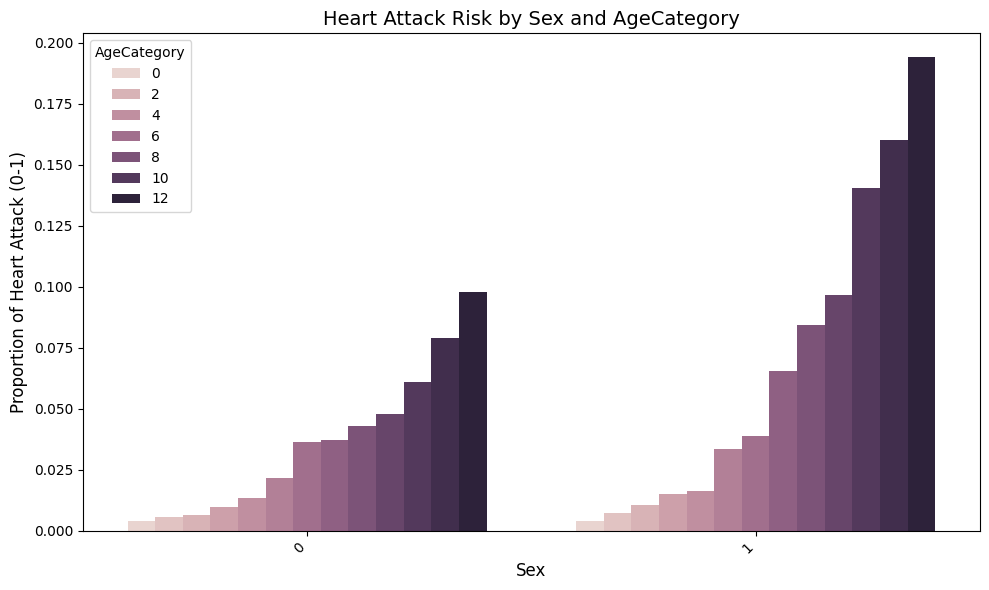

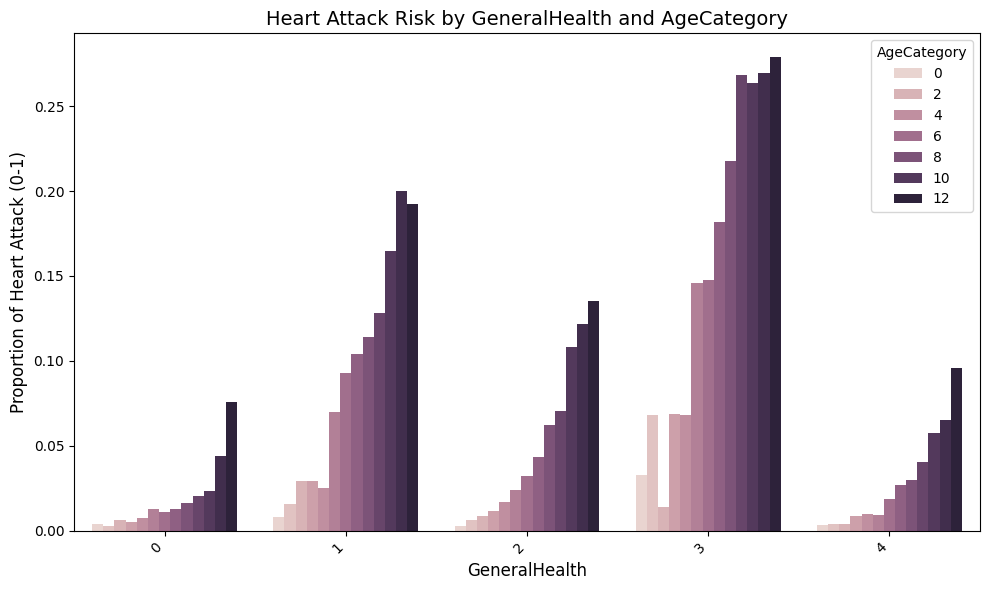

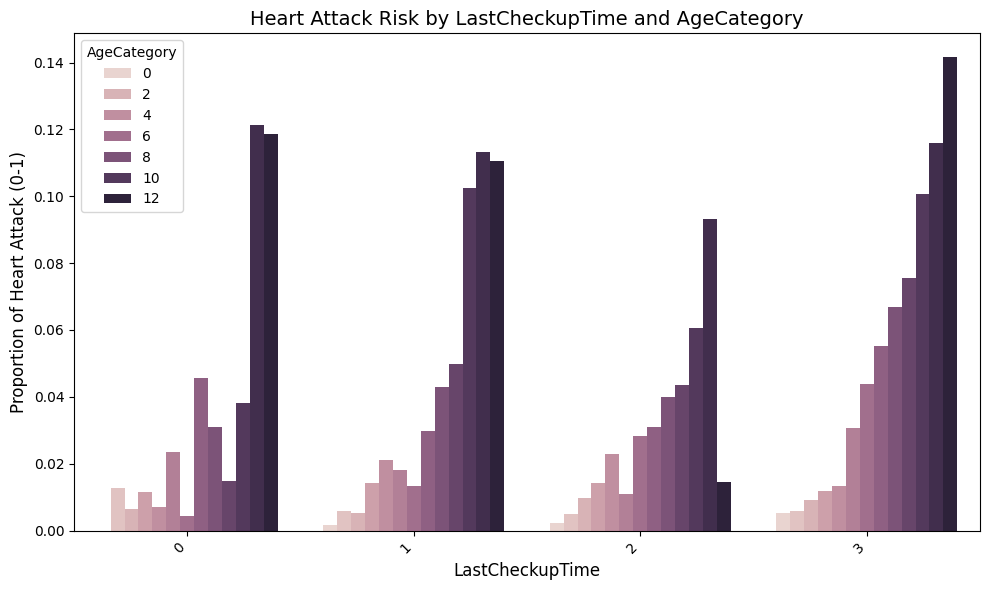

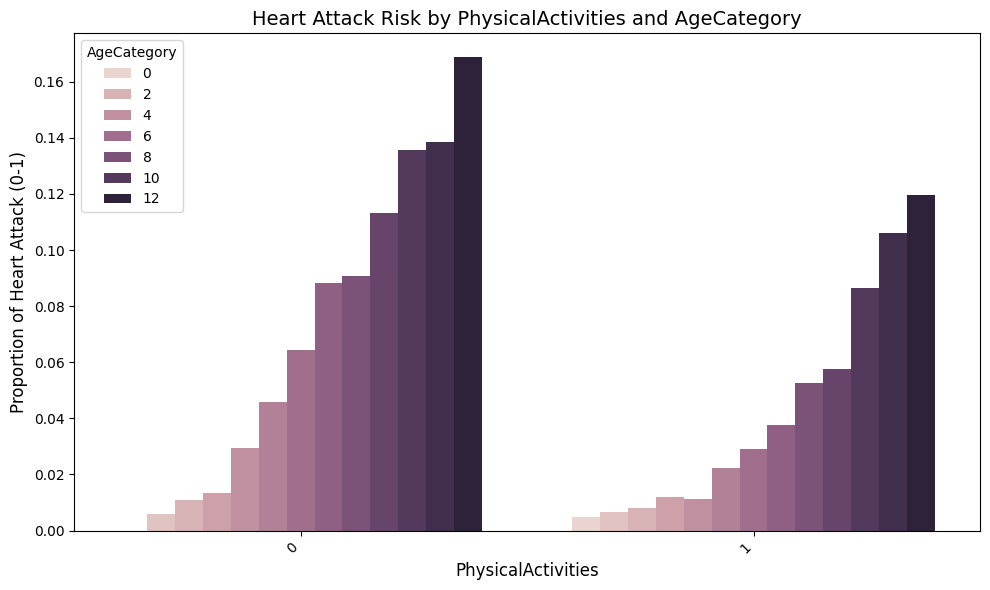

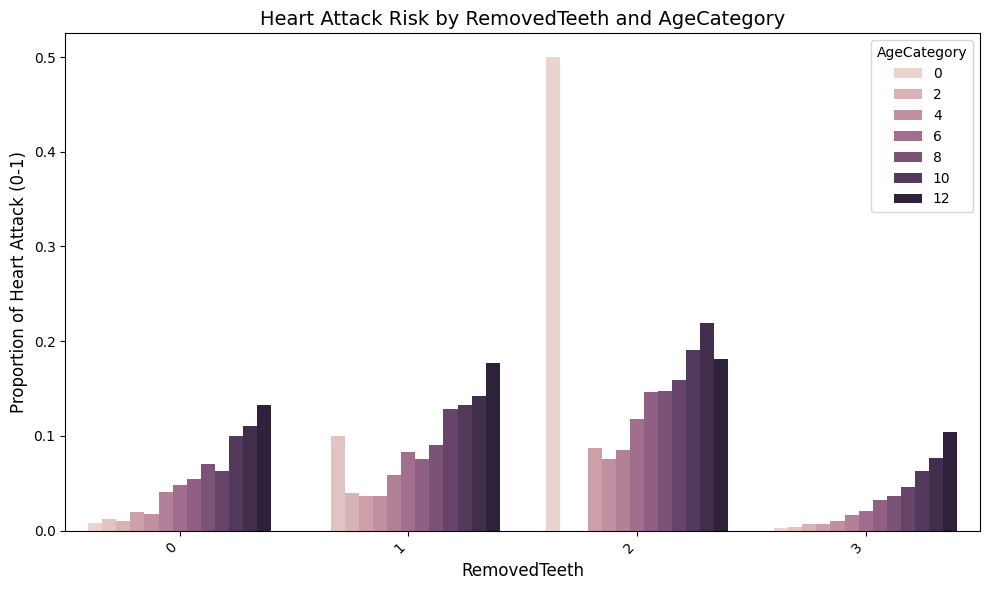

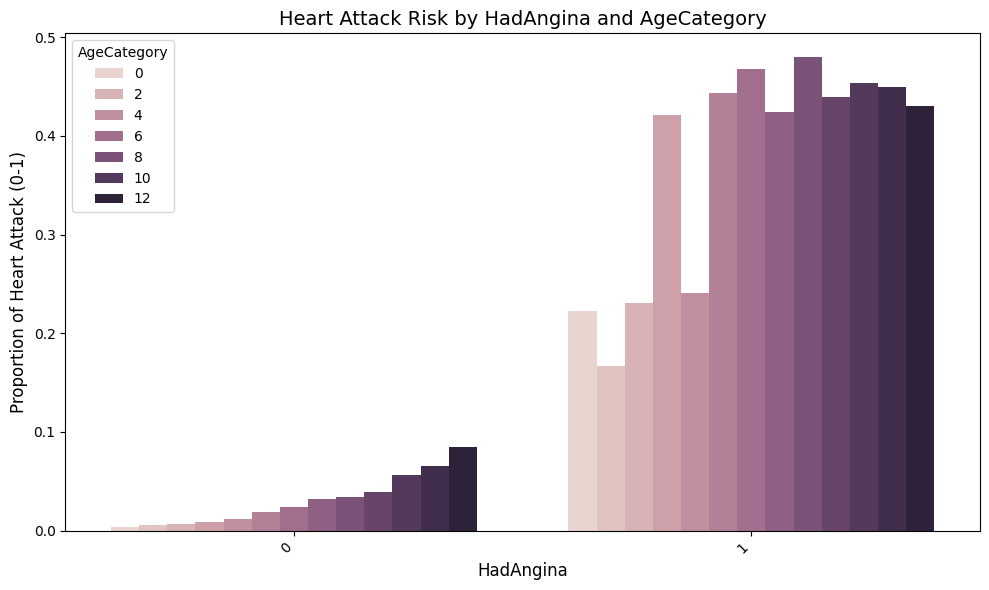

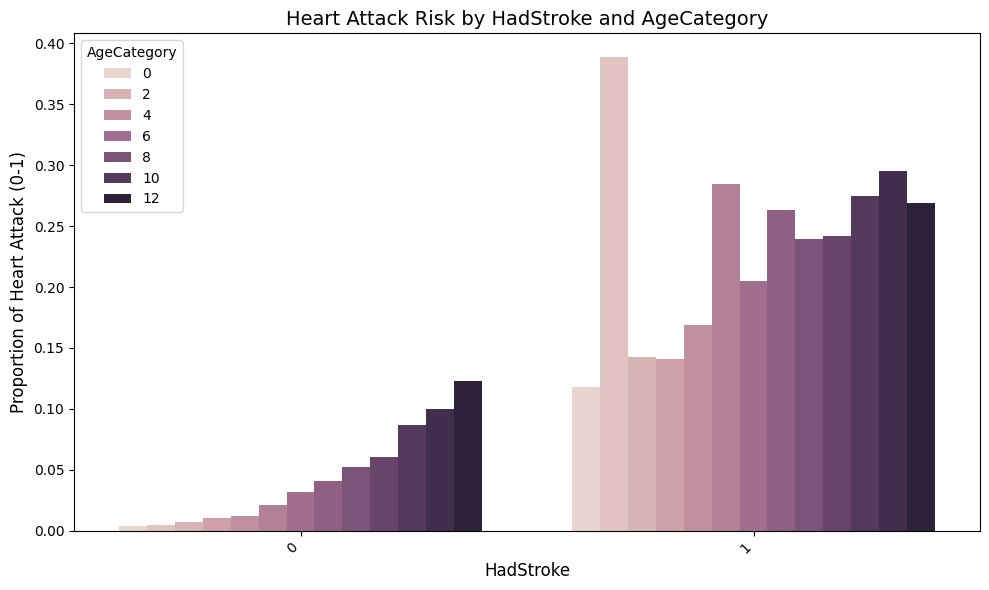

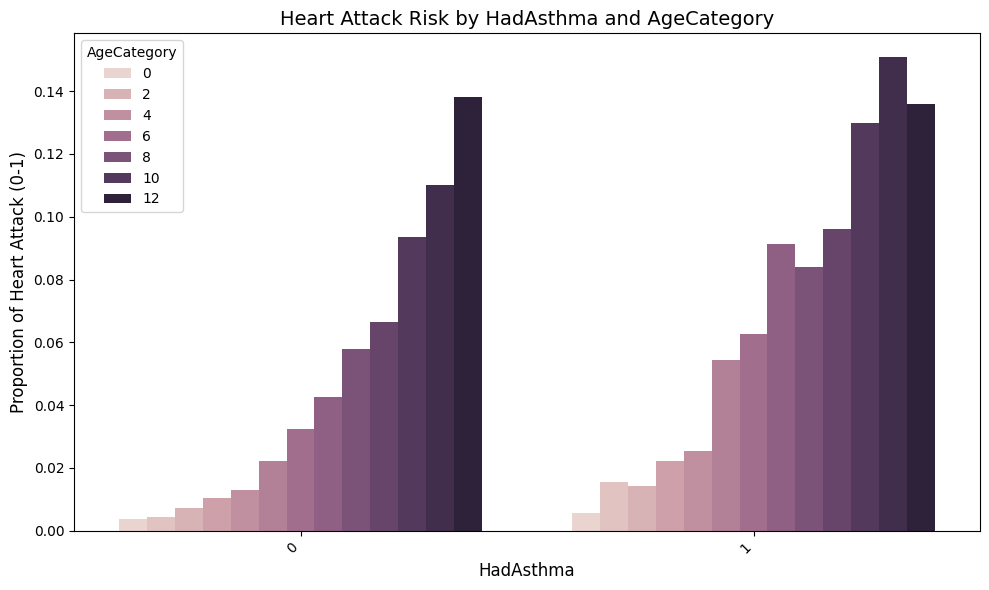

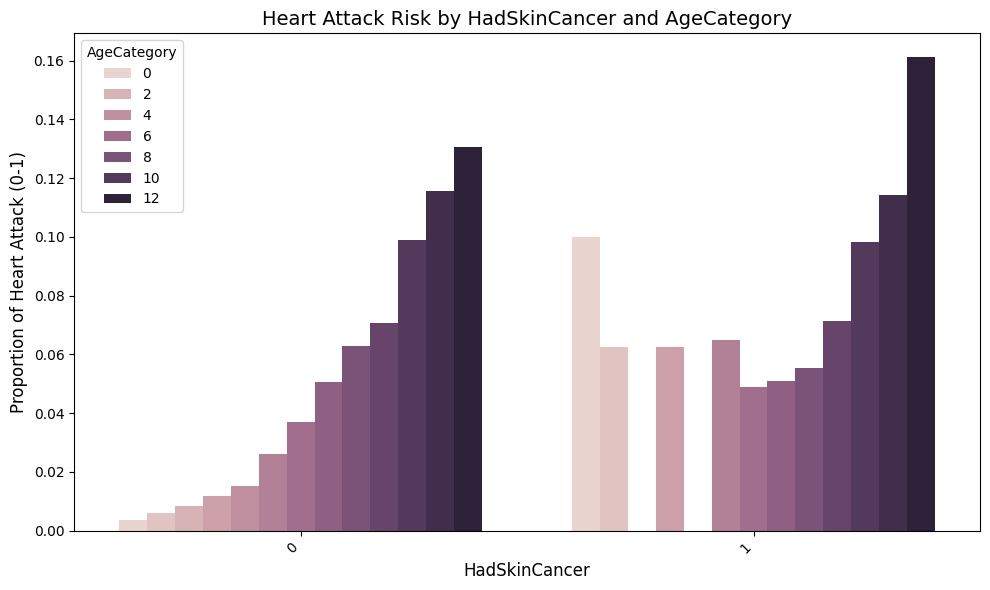

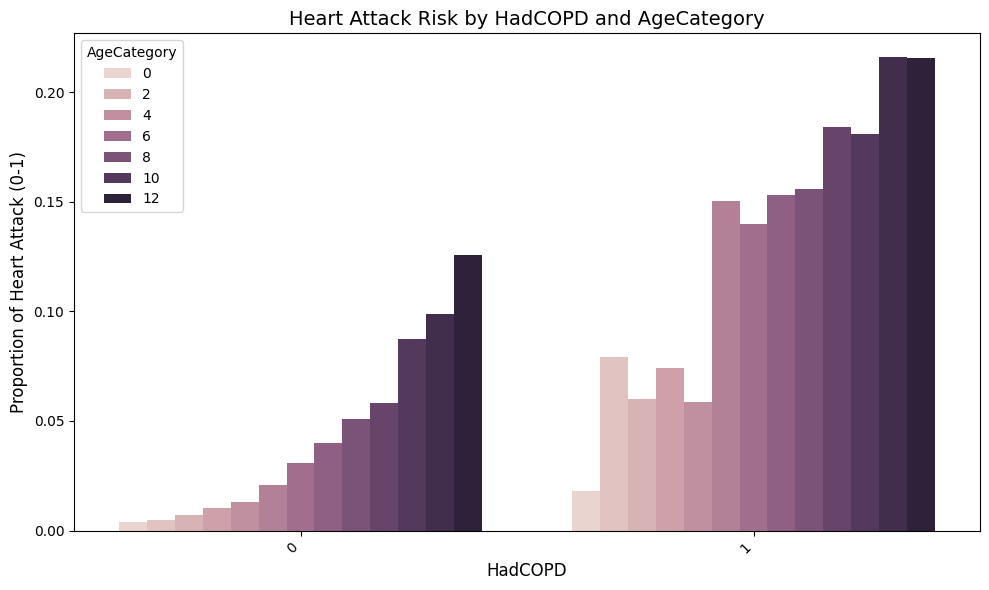

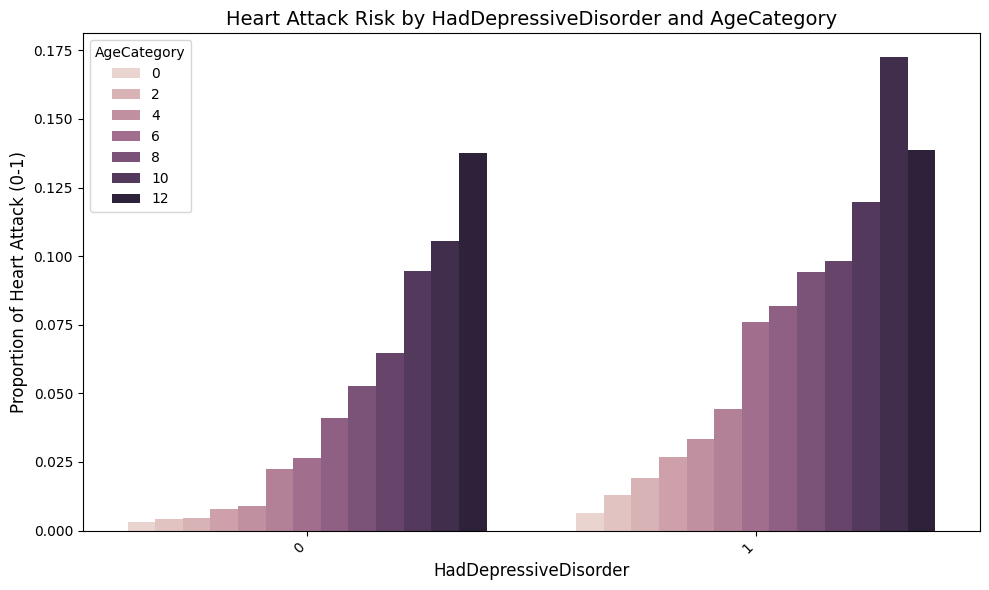

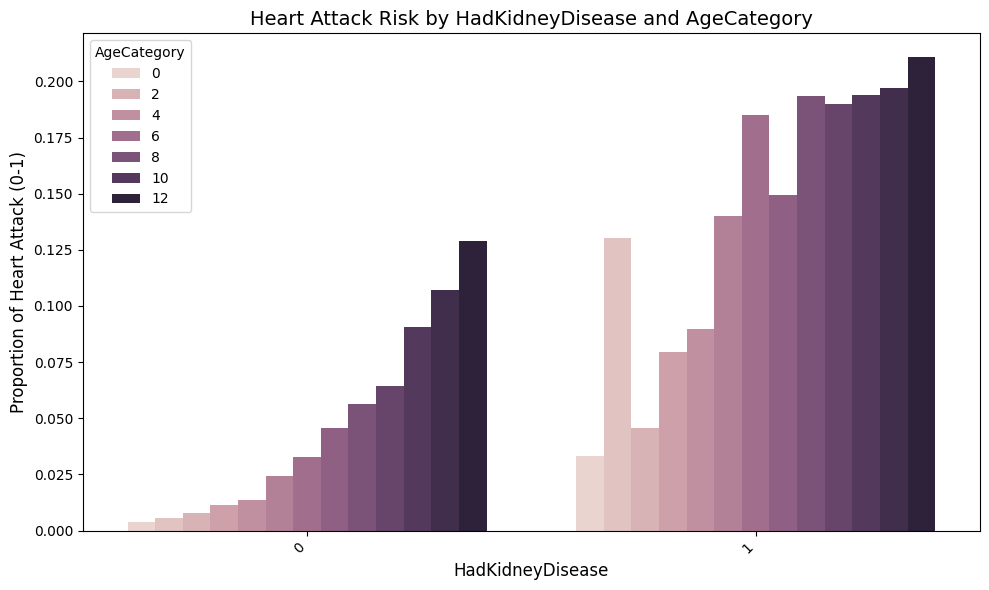

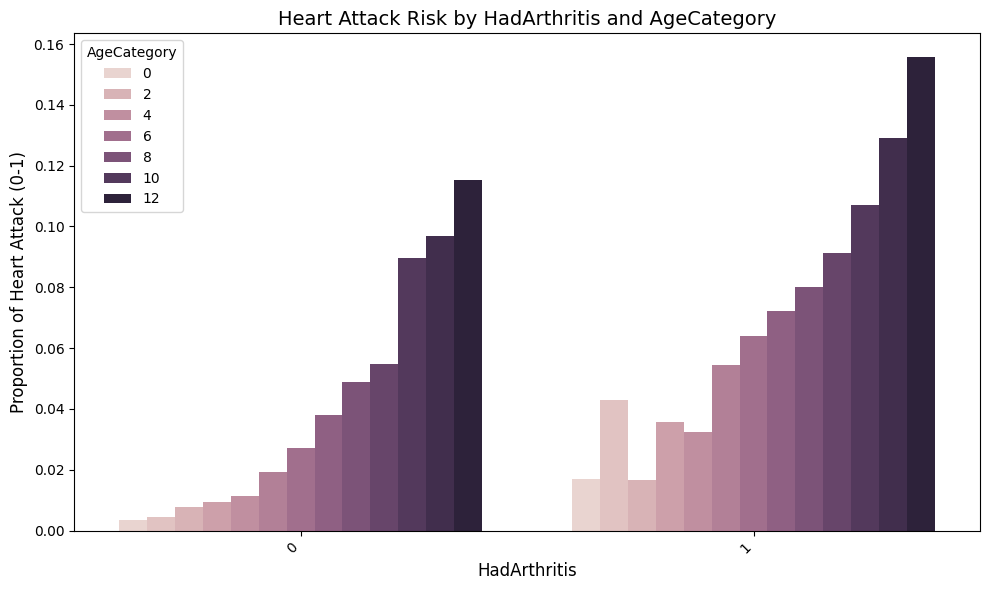

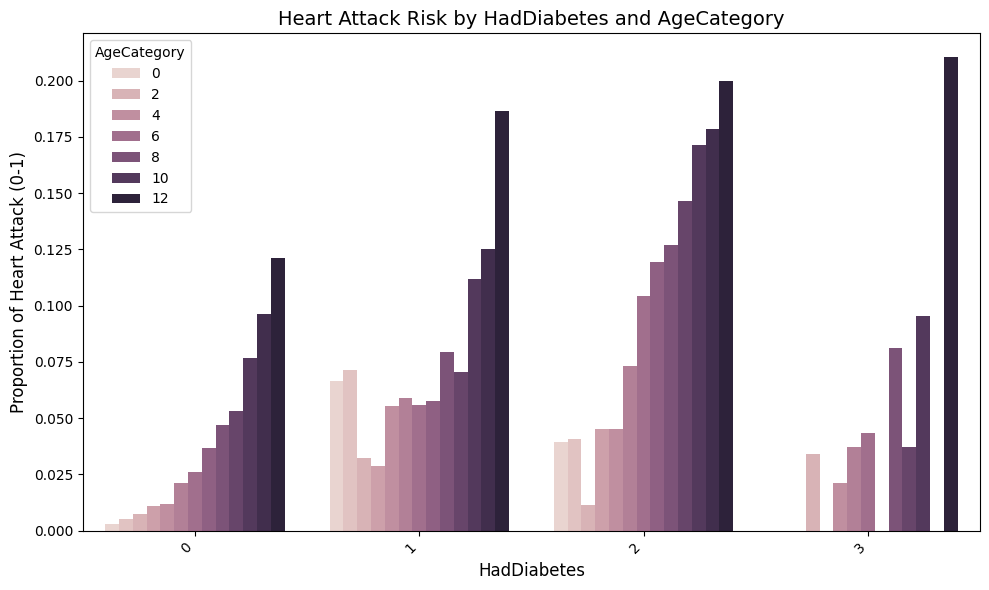

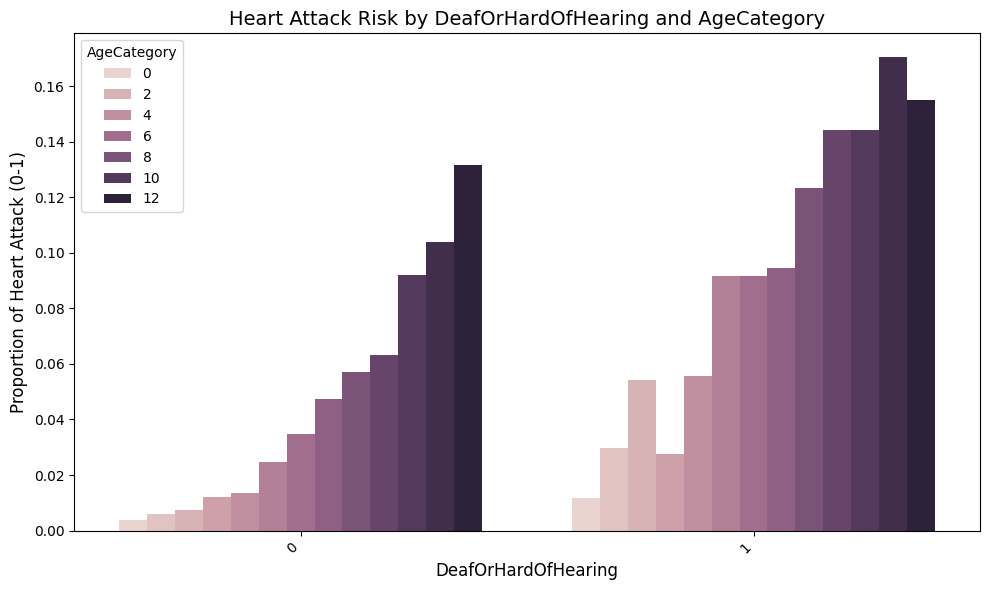

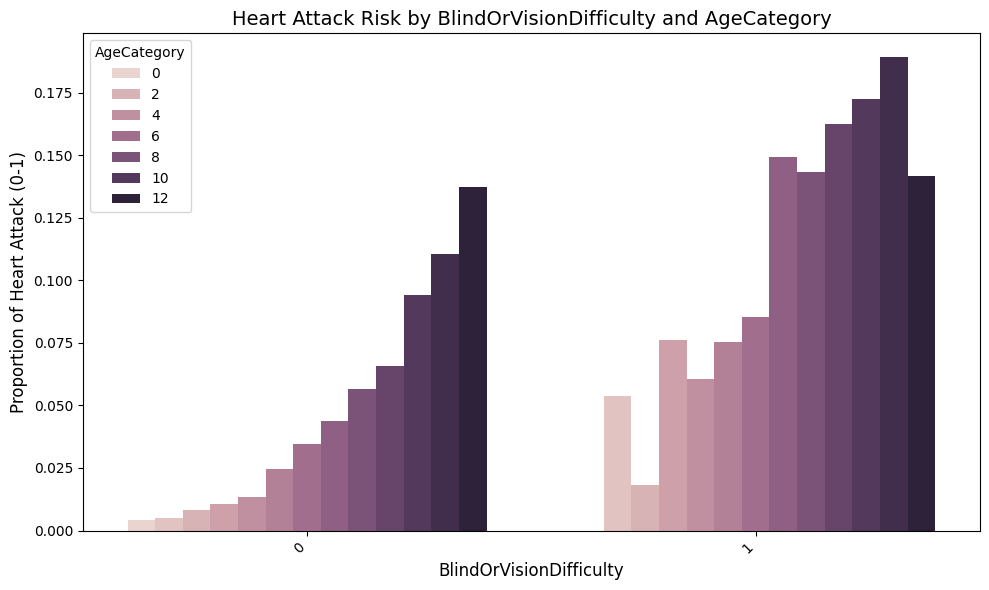

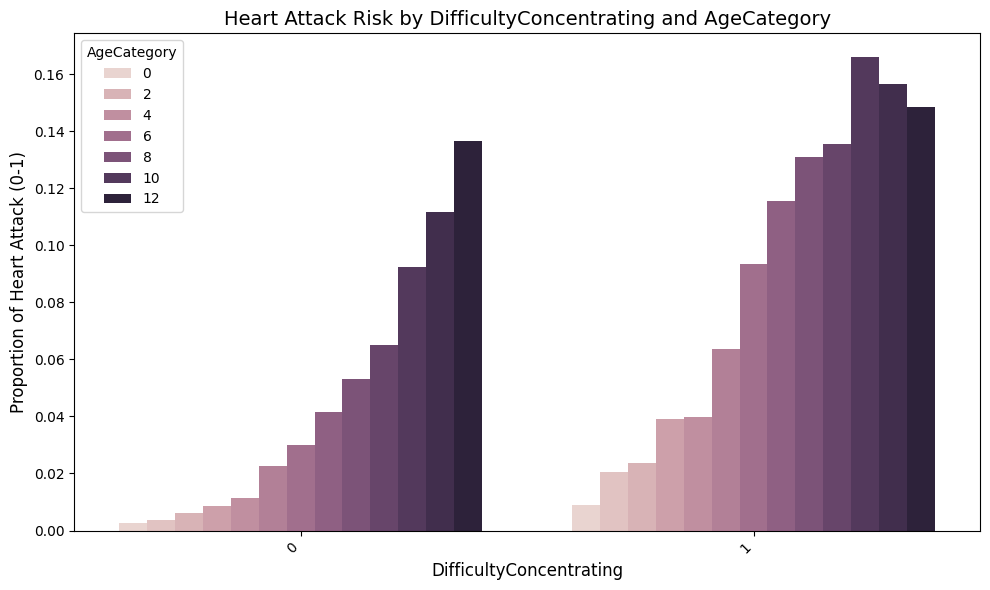

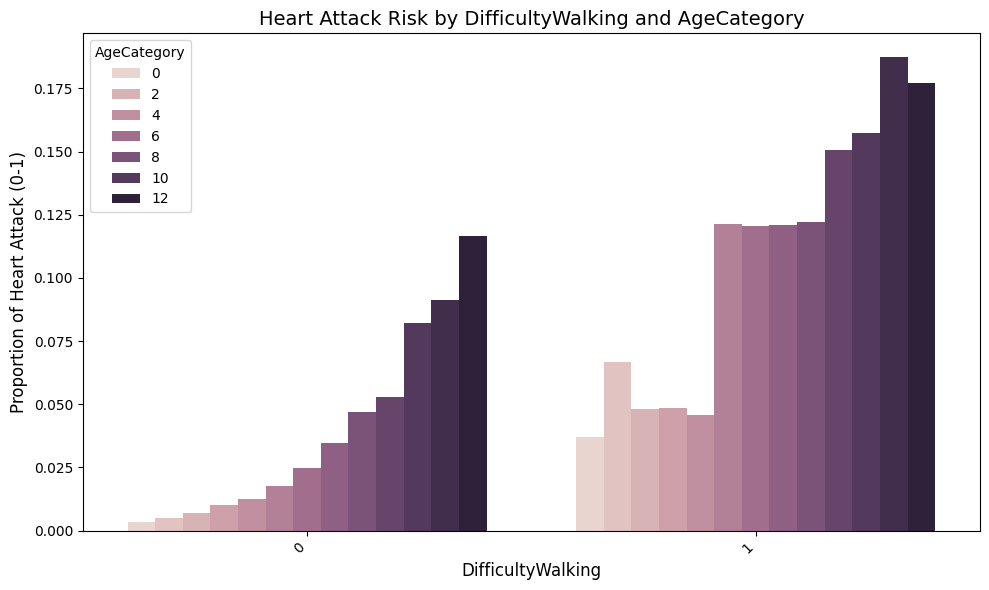

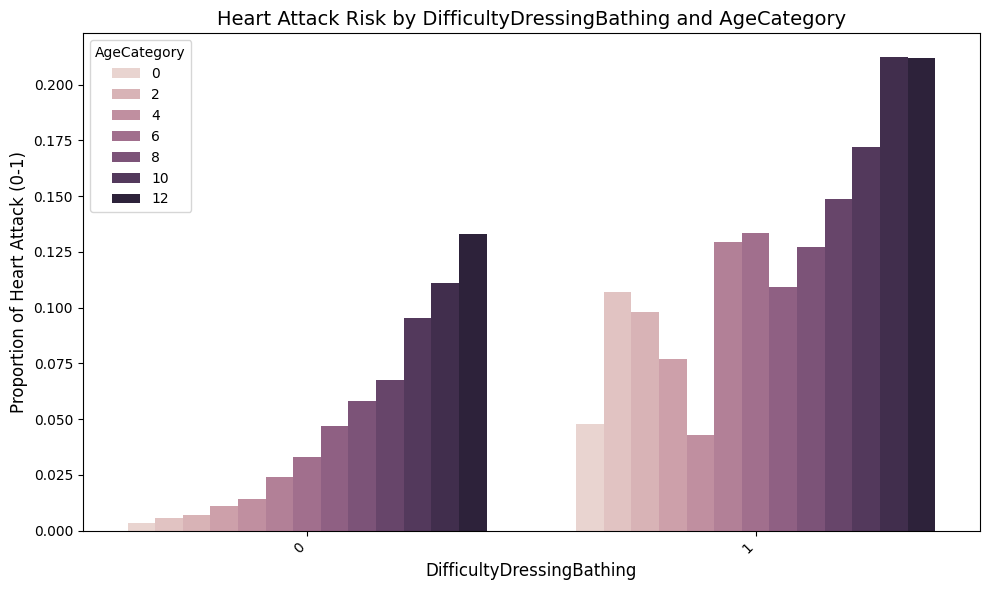

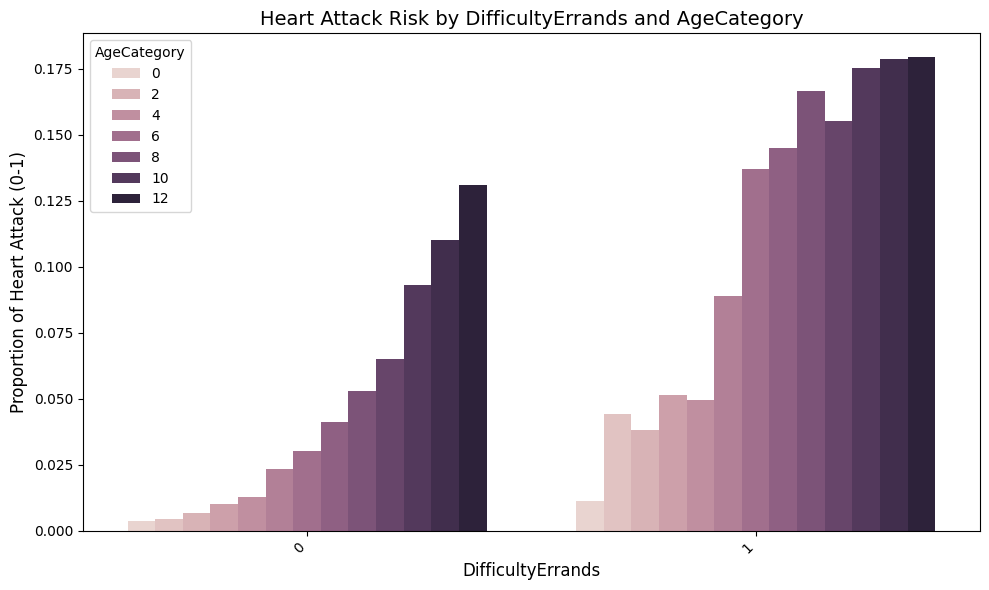

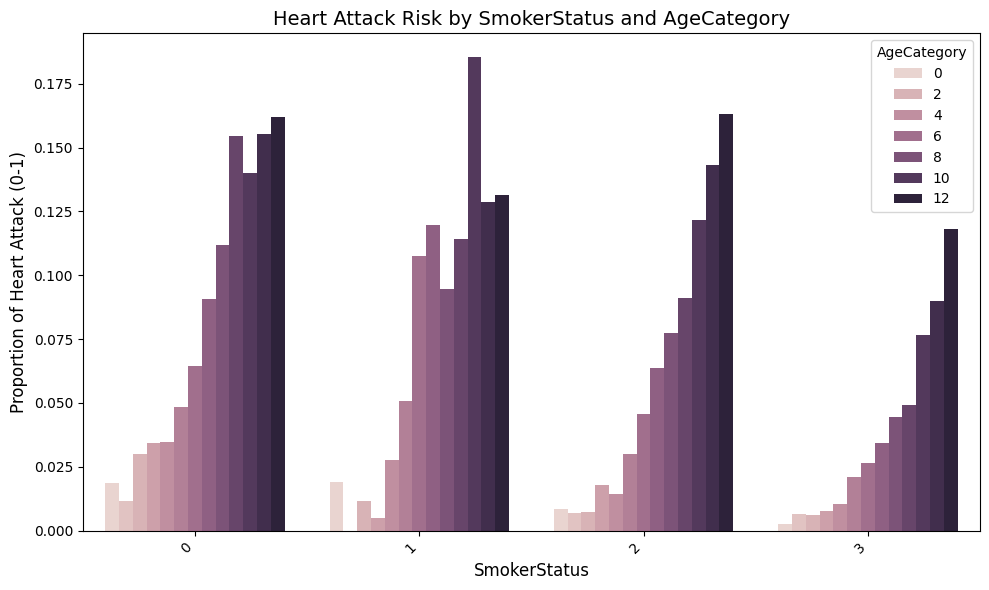

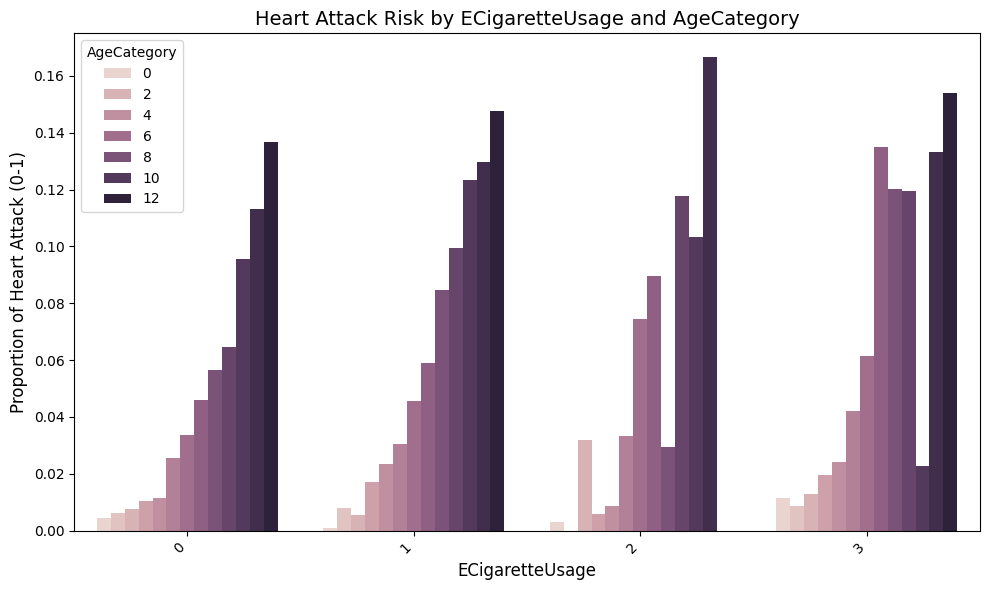

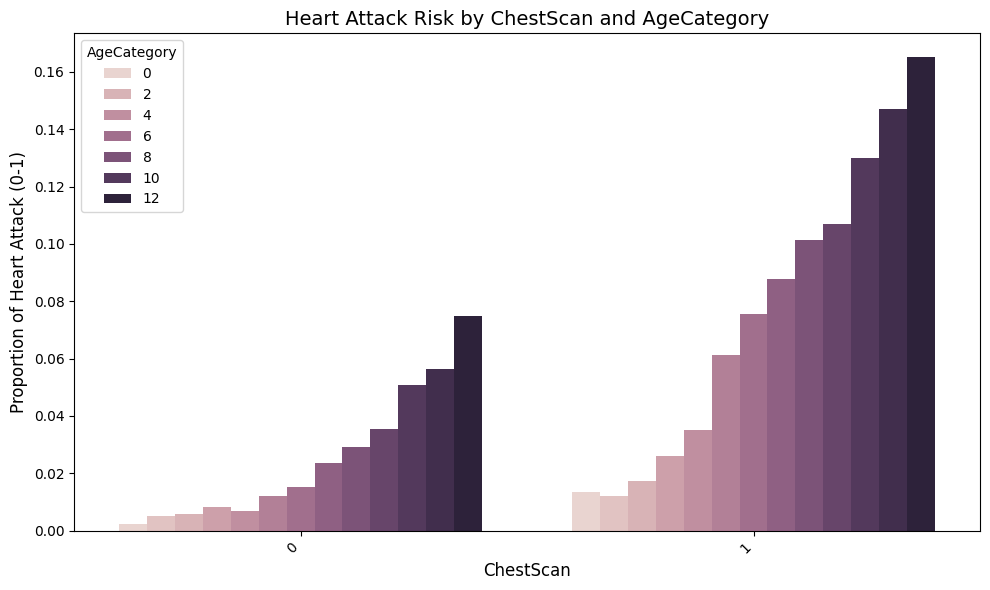

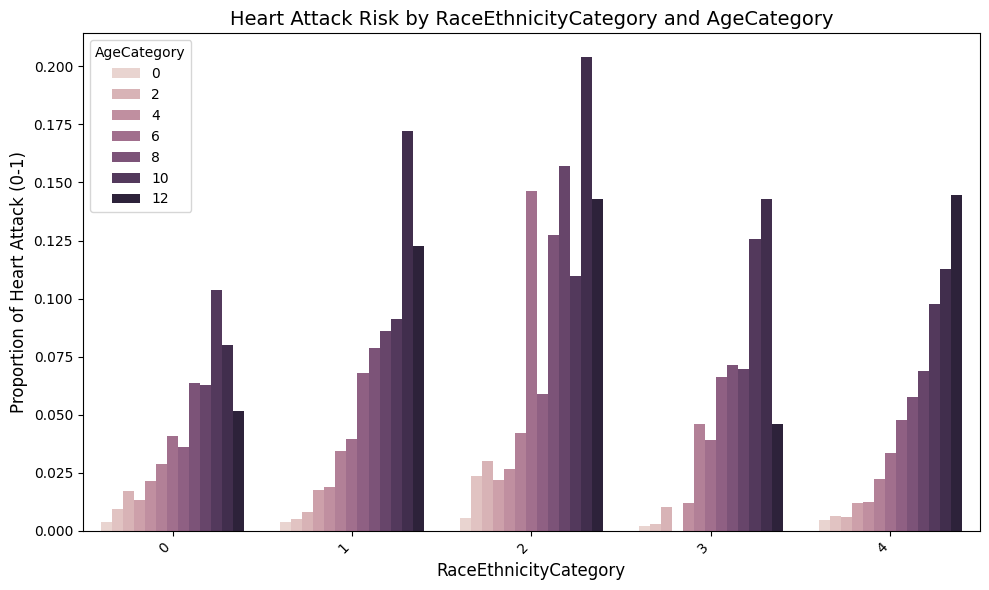

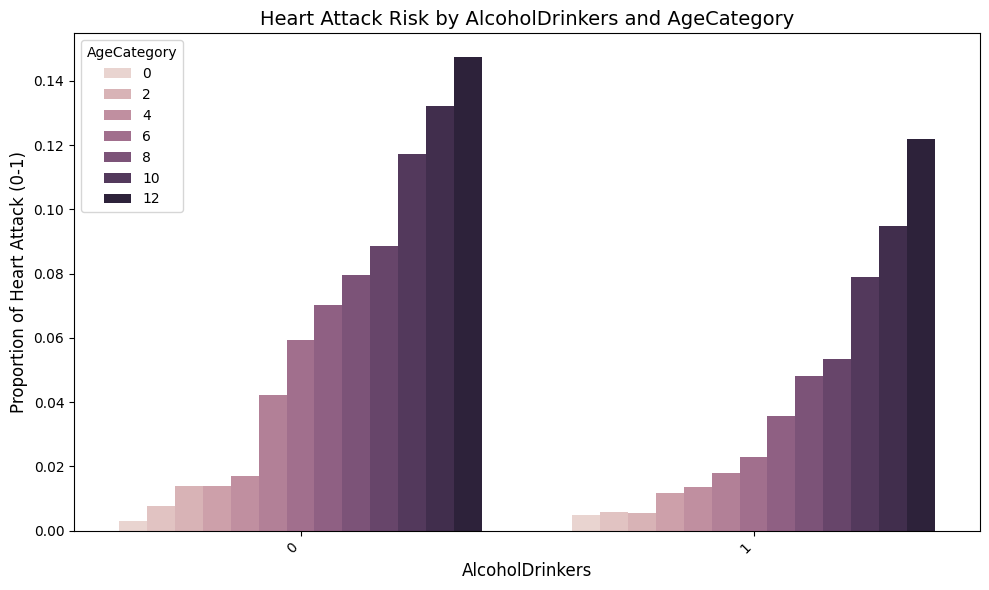

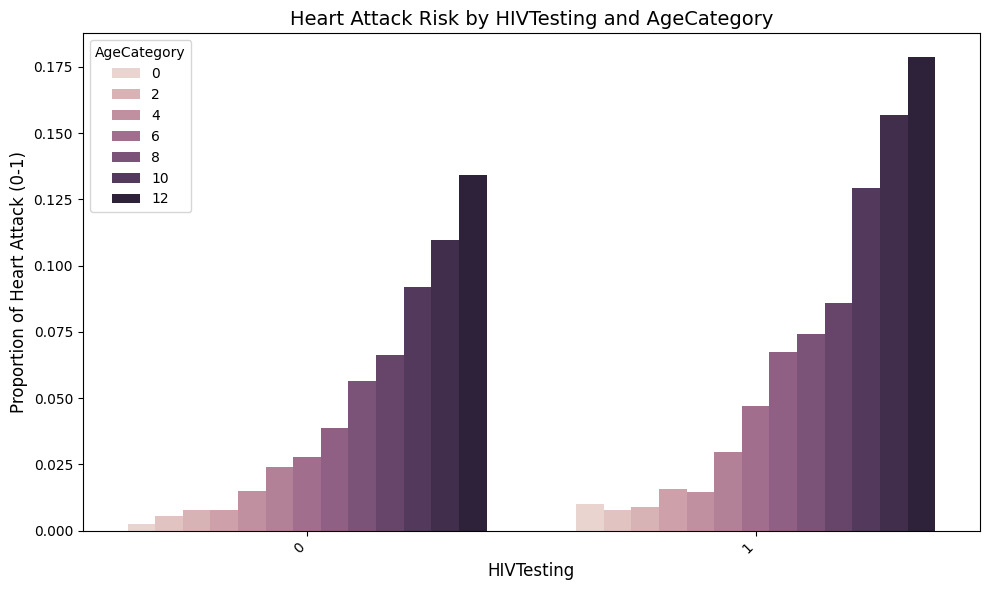

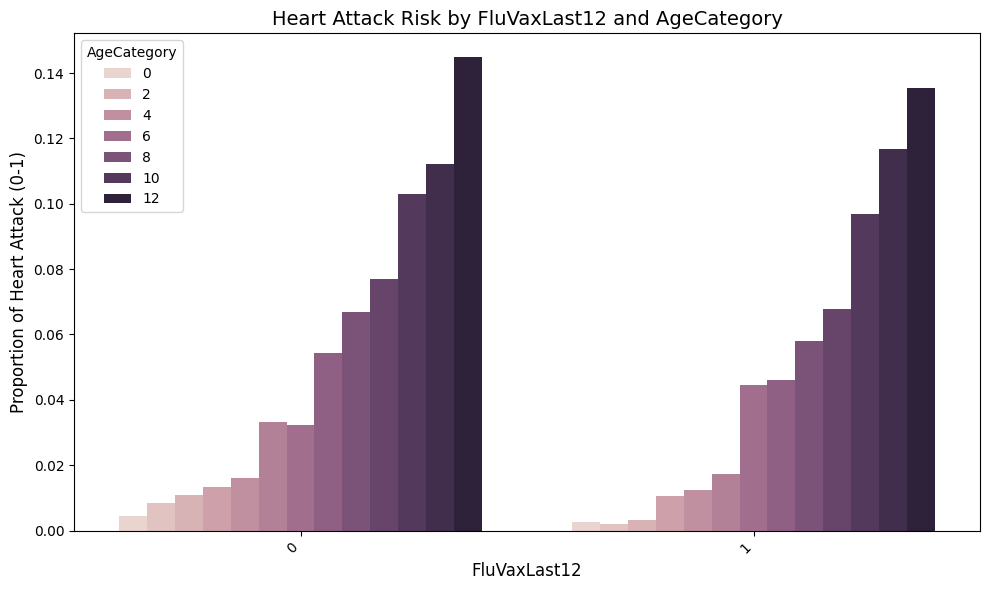

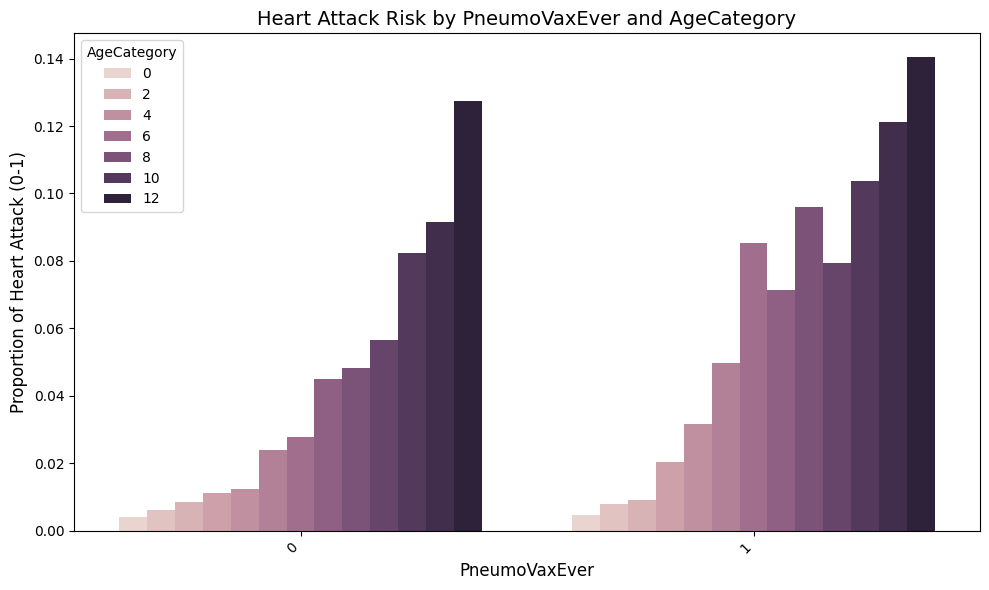

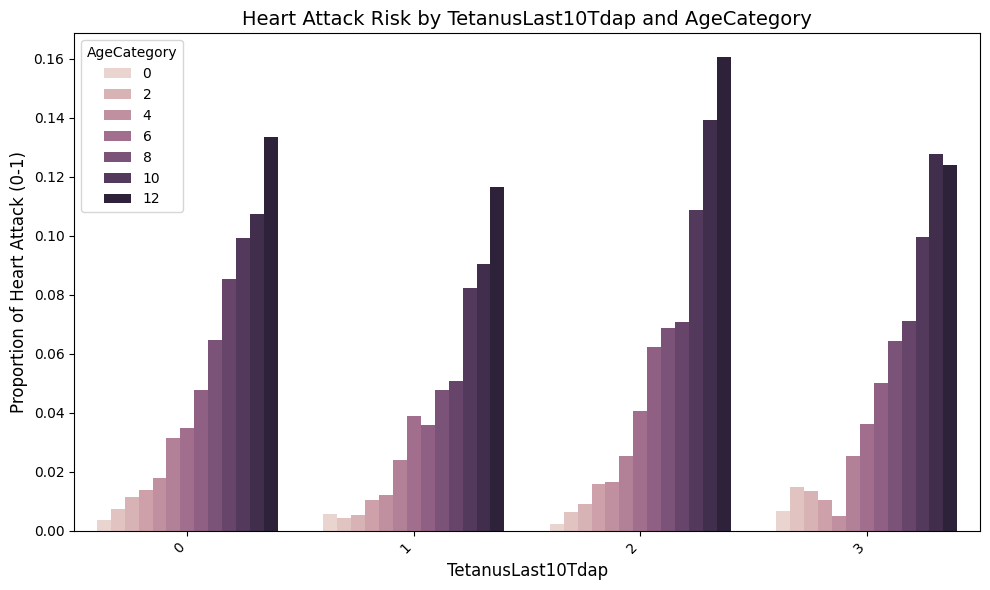

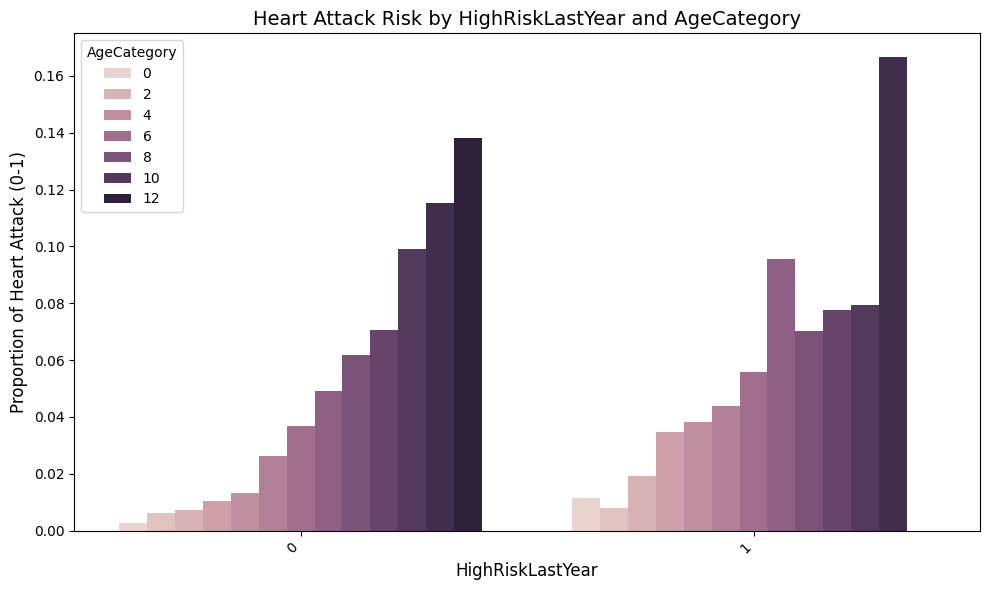

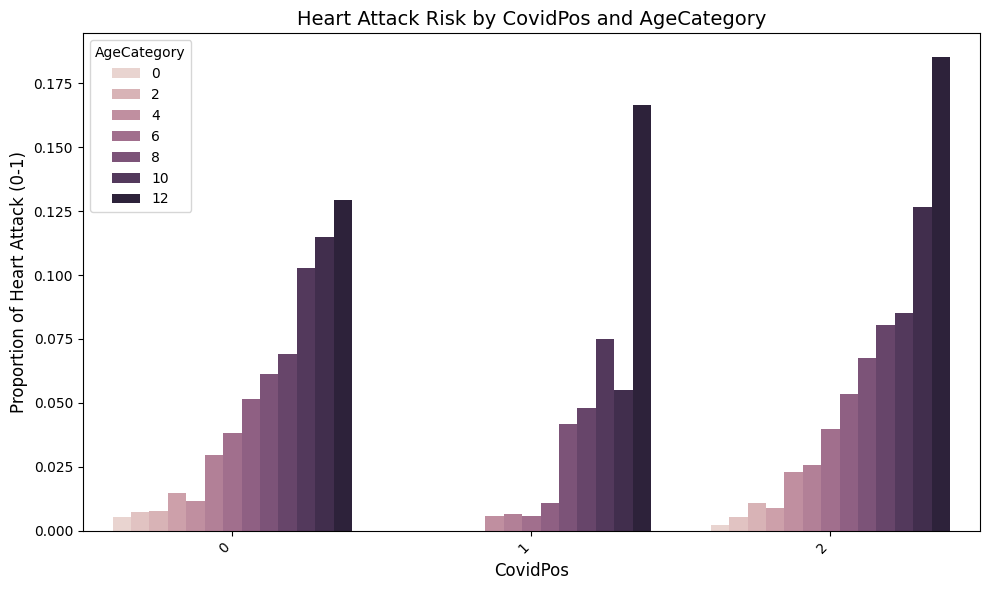

In [61]:
import seaborn as sns


# ÂÆöÁæ©ÁâπÂæµÂàóË°®ÂíåÁõÆÊ®ôËÆäÊï∏
features = df.drop(columns="HadHeartAttack")
target = 'HadHeartAttack'

# ÈÅ∏Êìá‰∏ÄÂÄã‰∏ªË¶ÅÂàÜÈ°ûËÆäÊï∏‰ΩúÁÇ∫‰∫§‰∫íÂü∫Ê∫ñ
interaction_base = 'AgeCategory'

# ÂÆöÁæ©ÈÄ£Á∫åËÆäÊï∏ÂíåÂàÜÈ°ûËÆäÊï∏
continuous_vars = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
categorical_vars = [f for f in features if f not in continuous_vars and f != interaction_base]

# 1. ÈÄ£Á∫åËÆäÊï∏ÔºöÊï£ÈªûÂúñËßÄÂØü‰∫§‰∫í‰ΩúÁî®ÔºàËàáAgeCategoryÔºâ
for feature in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y=target, hue=interaction_base, s=100)
    plt.title(f'Relationship between {feature} and Heart Attack Risk by {interaction_base}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Had Heart Attack (0 = No, 1 = Yes)', fontsize=12)
    plt.legend(title=interaction_base)
    plt.tight_layout()
    plt.show()

# 2. ÂàÜÈ°ûËÆäÊï∏ÔºöÂàÜÁµÑÊ¢ùÂΩ¢ÂúñËßÄÂØü‰∫§‰∫í‰ΩúÁî®ÔºàËàáAgeCategoryÔºâ
for feature in categorical_vars:
    plt.figure(figsize=(10, 6))
    # Ë®àÁÆóÊØèÂÄãÁµÑÂêà‰∏ãÁöÑÂøÉËáüÁóÖÊØî‰æã
    grouped = df.groupby([feature, interaction_base])[target].mean().reset_index()
    sns.barplot(data=grouped, x=feature, y=target, hue=interaction_base)
    plt.title(f'Heart Attack Risk by {feature} and {interaction_base}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Proportion of Heart Attack (0-1)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=interaction_base)
    plt.tight_layout()
    plt.show()

> Creating interaction terms

In [62]:
# there are related paper to support these
df["Sex_Age"] = df["Sex"] * df["AgeCategory"]
df["Weight_MentalHealthDays"] = df["WeightInKilograms"] * df["MentalHealthDays"]
df["Sex_Diabetes"] = df["Sex"] * df["HadDiabetes"]
df["AgeCategory_Diabetes"] = df["AgeCategory"] * df["HadDiabetes"]
df["BMI_Age"] = df["BMI"] * df["AgeCategory"] 
df["BMI_SleepHours"] = df["BMI"] * df["SleepHours"] 
df["SmokerStatus_Sex"] = df["SmokerStatus"] * df["Sex"]
df["SmokerStatus_Age"] = df["SmokerStatus"] * df["AgeCategory"]
df["PhysicalActivities_AgeCategory"] = df["PhysicalActivities"] * df["AgeCategory"]
df["PhysicalActivities_AgeCategory"] = df["PhysicalActivities"] * df["AgeCategory"]
df["AgeCategory_HadStroke"] = df["AgeCategory"] * df["HadStroke"]

# df["DifficultyWalking_GeneralHealth"] = df["DifficultyWalking"] * df["GeneralHealth"]
# df["BMI_DifficultyWalking"] = df["BMI"] * df["DifficultyWalking"]
# df["HadDiabetes_PhysicalActivities"] = df["HadDiabetes"] * df["PhysicalActivities"]
# df["HadKidneyDisease_PneumoVaxEver"] = df["HadKidneyDisease"] * df["PneumoVaxEver"]
# df["AlcoholDrinkers_HadAngina"] = df["AlcoholDrinkers"] * df["HadAngina"]


> Calculate features importance (test)

In [63]:
from sklearn.ensemble import RandomForestClassifier

all_terms = list(df.columns.drop("HadHeartAttack"))

X = df[all_terms]
y = df["HadHeartAttack"] 

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# ÂèñÂæó Feature Importance ÂàÜÊï∏
importance_df = pd.DataFrame({
    "Term": all_terms,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# È°ØÁ§∫ÁµêÊûú
display(importance_df)
condition = importance_df["Importance"] > (importance_df["Importance"].sum() / len(importance_df)) 
display(condition)

Term  Importance
9                        HadAngina    0.120063
43                         BMI_Age    0.069428
44                  BMI_SleepHours    0.065958
31                             BMI    0.059200
30               WeightInKilograms    0.053367
29                  HeightInMeters    0.043345
0                            State    0.034518
7                       SleepHours    0.031739
3               PhysicalHealthDays    0.029870
46                SmokerStatus_Age    0.027696
40         Weight_MentalHealthDays    0.026626
2                    GeneralHealth    0.023025
28                     AgeCategory    0.022775
39                         Sex_Age    0.021713
8                     RemovedTeeth    0.021565
36               TetanusLast10Tdap    0.020981
47  PhysicalActivities_AgeCategory    0.020126
4                 MentalHealthDays    0.018898
48           AgeCategory_HadStroke    0.016507
42            AgeCategory_Diabetes    0.016461
26                       ChestScan    0.014413
27           RaceEthnicityCategory    0.013130
24                    SmokerStatus    0.013075
21               DifficultyWalking    0.011169
10                       HadStroke    0.010953
16                    HadArthritis    0.010943
32                 AlcoholDrinkers    0.010783
34                    FluVaxLast12    0.010595
25                 ECigaretteUsage    0.010574
38                        CovidPos    0.010460
13                         HadCOPD    0.010125
45                SmokerStatus_Sex    0.010011
35                   PneumoVaxEver    0.009909
33                      HIVTesting    0.009226
11                       HadAsthma    0.008451
5                  LastCheckupTime    0.008289
18             DeafOrHardOfHearing    0.008221
15                HadKidneyDisease    0.008048
14           HadDepressiveDisorder    0.007669
17                     HadDiabetes    0.007619
12                   HadSkinCancer    0.007558
6               PhysicalActivities    0.007532
41                    Sex_Diabetes    0.007135
20         DifficultyConcentrating    0.006294
23               DifficultyErrands    0.006253
19         BlindOrVisionDifficulty    0.005899
1                              Sex    0.005172
22       DifficultyDressingBathing    0.004285
37                HighRiskLastYear    0.002348

9      True
43     True
44     True
31     True
30     True
29     True
0      True
7      True
3      True
46     True
40     True
2      True
28     True
39     True
8      True
36     True
47    False
4     False
48    False
42    False
26    False
27    False
24    False
21    False
10    False
16    False
32    False
34    False
25    False
38    False
13    False
45    False
35    False
33    False
11    False
5     False
18    False
15    False
14    False
17    False
12    False
6     False
41    False
20    False
23    False
19    False
1     False
22    False
37    False
Name: Importance, dtype: bool

### Output new final data

In [16]:
output_path = '../data/cleaned/heart_2022_cleaned_02.csv'
df.to_csv(output_path, index=False)